In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [33]:
datapath=r'D:\result\second\show_compare'
# show the file in the datapath
filelist=os.listdir(datapath)
print(filelist)
filepaths=[os.path.join(datapath,file) for file in filelist]


['data4gt_Autoformer.npy', 'data4gt_GRU.npy', 'data4gt_Informer.npy', 'data4gt_LSTM.npy', 'data4pd_Autoformer.npy', 'data4pd_GRU.npy', 'data4pd_Informer.npy', 'data4pd_LSTM.npy', 'scaler.pkl']


In [34]:
filepaths

['D:\\result\\second\\show_compare\\data4gt_Autoformer.npy',
 'D:\\result\\second\\show_compare\\data4gt_GRU.npy',
 'D:\\result\\second\\show_compare\\data4gt_Informer.npy',
 'D:\\result\\second\\show_compare\\data4gt_LSTM.npy',
 'D:\\result\\second\\show_compare\\data4pd_Autoformer.npy',
 'D:\\result\\second\\show_compare\\data4pd_GRU.npy',
 'D:\\result\\second\\show_compare\\data4pd_Informer.npy',
 'D:\\result\\second\\show_compare\\data4pd_LSTM.npy',
 'D:\\result\\second\\show_compare\\scaler.pkl']

In [45]:
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 假设 Scaler_file 是包含文件路径的字符串

# 加载 scaler 对象
Scaler_file = filepaths[-1]
with open(Scaler_file, 'rb') as f:
    full_scaler = pickle.load(f)


In [47]:
scaler = MinMaxScaler()
scaler.min_, scaler.scale_ = full_scaler.min_[4:5], full_scaler.scale_[4:5]

In [27]:
prediction_filepaths = [file for file in filepaths if 'pd' in str(file)]
prediction_filepaths
# split the name of the file, keep the name after '_' and before '.'
prediction_names = [file.split('_')[-1].split('.')[0] for file in prediction_filepaths]
prediction_names

['Autoformer', 'GRU', 'Informer', 'LSTM']

In [50]:
# 加载真实数据并进行反向变换
scaler = MinMaxScaler()
scaler.min_, scaler.scale_ = full_scaler.min_[4:5], full_scaler.scale_[4:5]
groundtruth_filepaths = [file for file in filepaths if 'gt' in str(file)]
groundtruth_filepaths=groundtruth_filepaths[0]
groundtruth_data = np.load(groundtruth_file)
groundtruth_data = scaler.inverse_transform(groundtruth_data.reshape(-1, 1)).flatten()

(400, 1)


Autoformer
Autoformer
GRU
Informer
LSTM


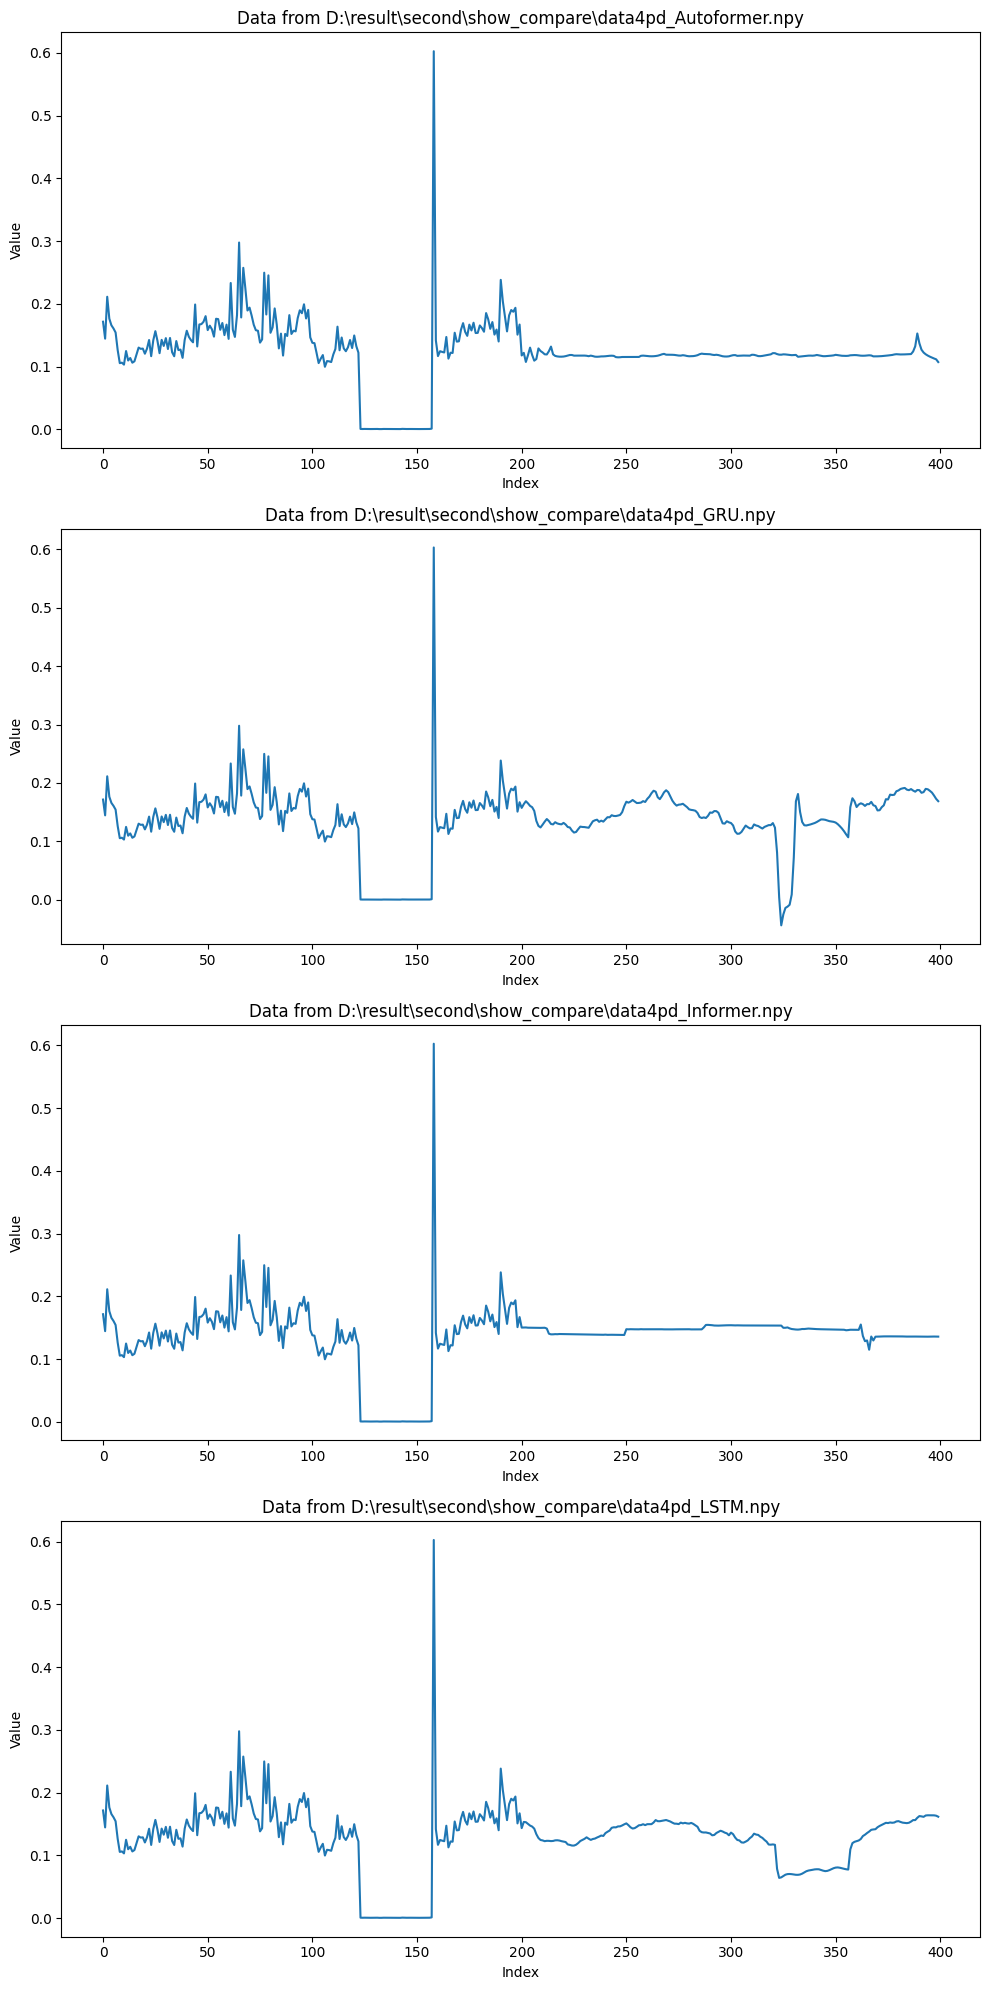

In [29]:
prediction_filepaths = [file for file in filepaths if 'pd' in str(file)]
prediction_filepaths
groundtruth_filepaths = [file for file in filepaths if 'gt' in str(file)]
groundtruth_filepaths=groundtruth_filepaths[0]

fig, axes = plt.subplots(4, 1, figsize=(10, 20))

# 遍历每个文件路径并绘制数据
for i, file in enumerate(prediction_filepaths):
    label= file.split('_')[-1].split('.')[0]
    print(label)
    data = np.load(file)
    axes[i].plot(data)
    axes[i].set_title(f'Data from {file}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Value')

# 调整子图之间的布局
plt.tight_layout()
plt.show()


[29050000. 24503402. 35751900. 29873400. 28087302. 27231900. 26157602.
 21418800. 17929000. 18061100.]
Autoformer
GRU
Informer
LSTM


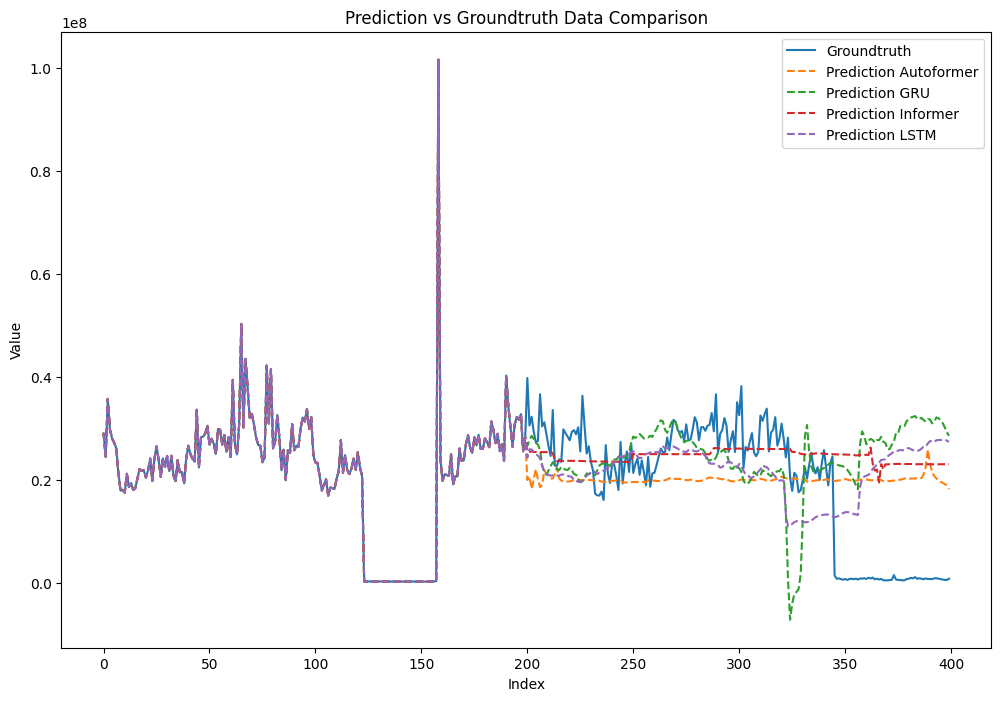

In [52]:
# 加载 scaler 对象
Scaler_file = filepaths[-1]
with open(Scaler_file, 'rb') as f:
    full_scaler = pickle.load(f)

# 提取第五个变量的缩放参数
scaler = MinMaxScaler()
scaler.min_, scaler.scale_ = full_scaler.min_[4:5], full_scaler.scale_[4:5]


prediction_filepaths = [file for file in filepaths if 'pd' in str(file)]
groundtruth_filepaths = [file for file in filepaths if 'gt' in str(file)]
groundtruth_file = groundtruth_filepaths[0]

# 读取groundtruth数据
groundtruth_data = np.load(groundtruth_file)
groundtruth_data = scaler.inverse_transform(groundtruth_data.reshape(-1, 1)).flatten()
print(groundtruth_data[:10])
# 创建一个包含所有数据的图
plt.figure(figsize=(12, 8))

# 绘制groundtruth数据
plt.plot(groundtruth_data, label='Groundtruth',  linestyle = '-')

# 遍历每个文件路径并绘制数据
for file in prediction_filepaths:
    label = file.split('_')[-1].split('.')[0]
    print(label)
    prediction_data = np.load(file)
    prediction_data = scaler.inverse_transform(prediction_data.reshape(-1, 1)).flatten()

    plt.plot(prediction_data, label=f'Prediction {label}', linestyle='--')

# 设置标题和标签
plt.title('Prediction vs Groundtruth Data Comparison')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# 显示图表
plt.show()